## 3. reHMM classification

In this step, the predictions from RF and HMM models were fed to a second HMM model layer (“reHMM”). 

In [2]:
import numpy as np
from hmmlearn import hmm
from scipy.linalg import block_diag
from ssm.util import find_permutation
import autograd.numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ssm
import pandas as pd
from ssm.plots import gradient_cmap, white_to_color_cmap
from hmmlearn.hmm import GaussianHMM
import os
import collections
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.dates import MonthLocator

%matplotlib inline

In [3]:
# HMM source: https://hmmlearn.readthedocs.io/en/latest/

model_rehmm = hmm.GaussianHMM(n_components=6, covariance_type="diag", n_iter=101, verbose=True, random_state=0)


In [4]:
import pickle 
#load the model to disk
filename = '.sav' # load .sav file

# Load the pickled model 
model_rehmm = pickle.load(open(filename, 'rb'))

In [ ]:
# load data (predictions from RF and HMM)
data_csv = pd.read_csv(r"C:\Users\.csv", index_col=0)
feature_dict = data_csv[['hmm_6_merged','RF_behavior_merged_repl']].copy()


In [40]:
# reHMM classification
model_rehmm = model_rehmm.fit(feature_dict)
a_hidden_states = model_rehmm.predict(feature_dict)

# save reHMM predictions
data_csv['rehmm'] = a_hidden_states
data_csv.to_csv(r"C:\Users\.csv")

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
         1     -538208.5462             +nan
         2     -430287.3528     +107921.1934
         3     -280506.8101     +149780.5427
         4     -233287.8802      +47218.9300
         5     -125659.1735     +107628.7066
         6      178309.0001     +303968.1736
         7      447615.9939     +269306.9938
         8      567725.2741     +120109.2801
         9      614174.0656      +46448.7915
        10      615857.8123       +1683.7467
        11      616168.7407        +310.9284
     

,RF_behavior_merged,hmm_6_merged,RF_behavior_merged_repl,ear_x_merged,ear_y_merged,angle_1_merged,angle_2_merged,velocity_snout_merged,velocity_body_center_merged,distance_merged,file_name,rehmm
0,HD,4,1,463.033585,465.182770,328.881257,18.147878,0.391266,0.137230,544.738181,20191211_behavior_1_2_N0_mer,2
1,HD,4,1,475.032288,468.282288,343.884271,4.559486,2.659956,0.559576,543.840825,20191211_behavior_1_2_N0_mer,2
2,HD,2,1,477.871536,500.640717,30.019665,49.664968,1.247620,0.332970,562.012197,20191211_behavior_1_2_N0_mer,0
3,HD,2,1,477.971527,503.054855,27.973546,48.112987,0.771511,0.646967,563.782448,20191211_behavior_1_2_N0_mer,0
4,HD,2,1,476.387177,507.110489,28.881805,49.553743,0.554993,0.217040,566.702686,20191211_behavior_1_2_N0_mer,0


<AxesSubplot:>

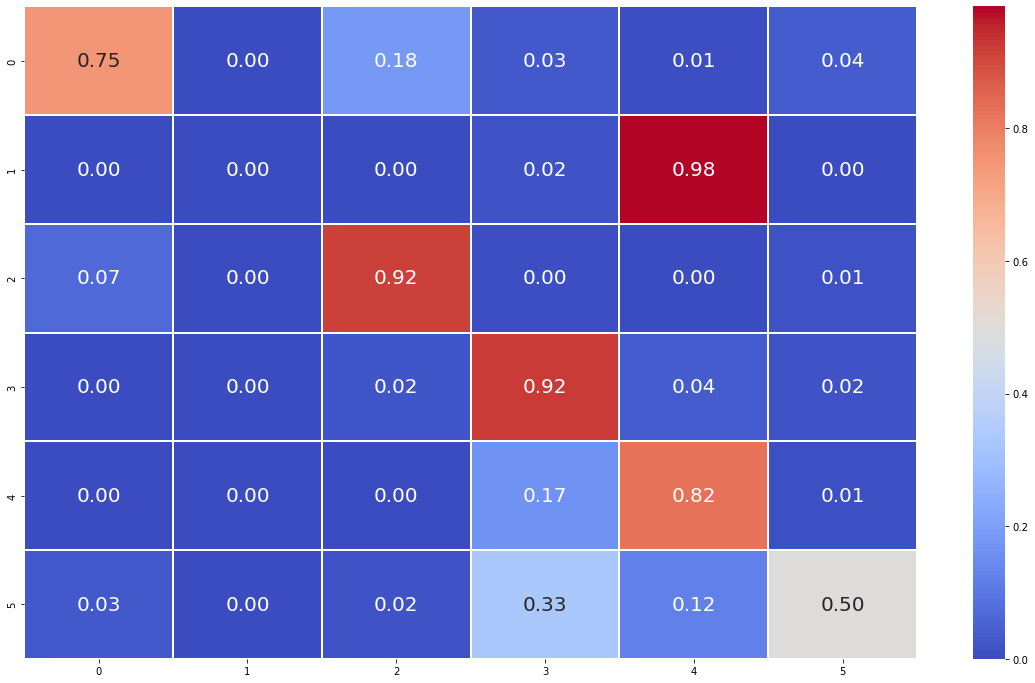

In [12]:
# reHMM state transition probability matrix  
print(model_rehmm.transmat_)

# reHMM state transition probability matrix plot
trasition_probility = model_rehmm.transmat_
plt.figure(figsize = (20,12))
sns.heatmap(trasition_probility, annot=True, cmap="coolwarm", fmt=".2f",linewidths=.2, annot_kws={'size':20})

In [42]:
# reHMM start probability
print (model_hmm.startprob_)

## 3.2 reHMM+ clasification

In this step, the predictions from RF and HMM models and selected positional feature were fed to a third HMM model layer (“reHMM+”). 

In [2]:
import numpy as np
from hmmlearn import hmm
from scipy.linalg import block_diag
from ssm.util import find_permutation
import autograd.numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ssm
import pandas as pd
from ssm.plots import gradient_cmap, white_to_color_cmap
from hmmlearn.hmm import GaussianHMM
import os
import collections
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.dates import MonthLocator

%matplotlib inline

In [16]:
# HMM source: https://hmmlearn.readthedocs.io/en/latest/
model_rehmm_plus = hmm.GaussianHMM(n_components=6, covariance_type="diag", n_iter=100, verbose=True, random_state=0)


In [17]:
import pickle 
#load the model to disk
filename = '.sav' # load .sav file

# Load the pickled model 
model_rehmm_plus = pickle.load(open(filename, 'rb'))

In [43]:
# load data (predictions from RF and HMM models and selected positional feature) 
data_csv = pd.read_csv(r"C:\.csv", index_col=0)
feature_dict = data_csv[['hmm_6_merged','RF_behavior_merged_repl','distance_merged']].copy()

,RF_behavior_merged,hmm_6_merged,RF_behavior_merged_repl,ear_x_merged,ear_y_merged,angle_1_merged,angle_2_merged,velocity_snout_merged,velocity_body_center_merged,distance_merged,file_name,rehmm
0,HD,4,1,463.033585,465.182770,328.881257,18.147878,0.391266,0.137230,544.738181,20191211_behavior_1_2_N0_mer,2
1,HD,4,1,475.032288,468.282288,343.884271,4.559486,2.659956,0.559576,543.840825,20191211_behavior_1_2_N0_mer,2
2,HD,2,1,477.871536,500.640717,30.019665,49.664968,1.247620,0.332970,562.012197,20191211_behavior_1_2_N0_mer,0
3,HD,2,1,477.971527,503.054855,27.973546,48.112987,0.771511,0.646967,563.782448,20191211_behavior_1_2_N0_mer,0
4,HD,2,1,476.387177,507.110489,28.881805,49.553743,0.554993,0.217040,566.702686,20191211_behavior_1_2_N0_mer,0


In [46]:
# reHMM+ classification
model_rehmm_plus = model_rehmm_plus.fit(feature_dict)
a_hidden_states = model_rehmm_plus.predict(feature_dict)

# save reHMM+ predictions 
data_csv['rehmm+'] = a_hidden_states
data_csv.to_csv(r"C:\Users\.csv")

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
         1    -1431891.3025             +nan
         2    -1248336.2940     +183555.0084
         3    -1060041.3007     +188294.9933
         4     -647383.8558     +412657.4450
         5     -402961.6306     +244422.2251
         6     -310243.8035      +92717.8272
         7     -219812.7329      +90431.0706
         8     -214704.5818       +5108.1511
         9     -212093.2201       +2611.3617
        10     -211741.7664        +351.4537
        11     -211599.2762        +142.4902
     

,RF_behavior_merged,hmm_6_merged,RF_behavior_merged_repl,ear_x_merged,ear_y_merged,angle_1_merged,angle_2_merged,velocity_snout_merged,velocity_body_center_merged,distance_merged,file_name,rehmm,rehmm+
0,HD,4,1,463.033585,465.182770,328.881257,18.147878,0.391266,0.137230,544.738181,20191211_behavior_1_2_N0_mer,2,2
1,HD,4,1,475.032288,468.282288,343.884271,4.559486,2.659956,0.559576,543.840825,20191211_behavior_1_2_N0_mer,2,2
2,HD,2,1,477.871536,500.640717,30.019665,49.664968,1.247620,0.332970,562.012197,20191211_behavior_1_2_N0_mer,0,2
3,HD,2,1,477.971527,503.054855,27.973546,48.112987,0.771511,0.646967,563.782448,20191211_behavior_1_2_N0_mer,0,2
4,HD,2,1,476.387177,507.110489,28.881805,49.553743,0.554993,0.217040,566.702686,20191211_behavior_1_2_N0_mer,0,2


<AxesSubplot:>

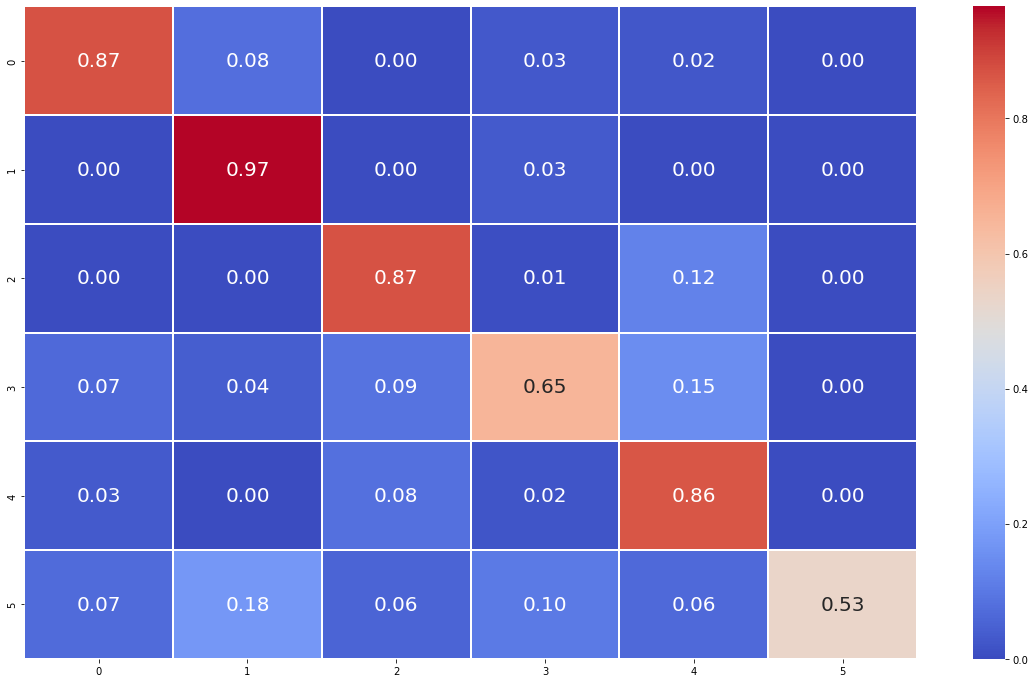

In [84]:
# reHMM+ state transition probability matrix 
print (model_rehmm_plus.transmat_)

# reHMM+ state transition probability matrix plot
trasition_probility = model_rehmm_plus.transmat_
plt.figure(figsize = (20,12))
sns.heatmap(trasition_probility, annot=True, cmap="coolwarm", fmt=".2f",linewidths=.2, annot_kws={'size':20})

In [48]:
# reHMM+ start probability
print(model_rehmm_plus.startprob_)

